# 슈퍼마켓 매출을 예측하는 선형모델 비교
## 데이터 받기
- 아래 사이트에서 로그인하고 register를 선택하면 데이터 다운로드 가능
- 데이터는 인도의 슈퍼마켓의 매출 기록 샘플이며 훈련데이터 8523개와 테스트 데이터 5681개를 제공함
- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
- 훈련 데이터 사본: https://bit.ly/2HsDP2p
- 테스트 데이터 사본: https://bit.ly/2WgqtdO

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
!curl -L https://bit.ly/2HsDP2p -o Train_UWu5bXk.txt
!curl -L https://bit.ly/2WgqtdO -o Test_u94Q5KV.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: bit.ly
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: bit.ly


In [4]:
# 슈퍼마켓 매출 데이터 읽기, 먼저 위의 사이트에 가서 등록을 하고 다운로드 받아야 함
train = pd.read_csv('Train_UWu5bXk.txt')
test = pd.read_csv('Test_u94Q5KV.txt')

In [5]:
train.shape

(8523, 12)

In [6]:
train.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 두 개의 입력 특성 사용

In [8]:
# 데이터 나누기
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP']]

In [12]:
# train[['Outlet_Establishment_Year','Item_MRP']]

In [13]:
# 선형회귀 모델
# 예측 특성으로 매장 개장 연도와 가격(Item_MRP) 두 개만 사용하는 경우

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales,
                                                   test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)
# 오차 자승의 평균, mse 계산
mse = np.mean((pred - y_test)**2)
# mse와 rmse 출력
print(mse, mse**(0.5))
print(lreg.score(x_test, y_test))

1990314.4086564414 1410.7850327588683
0.3242020337746537


In [14]:
lreg.coef_, x_train.columns

(array([-9.63343761, 15.64158088]),
 Index(['Outlet_Establishment_Year', 'Item_MRP'], dtype='object'))

In [15]:
# 선형모델 계수 출력

coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


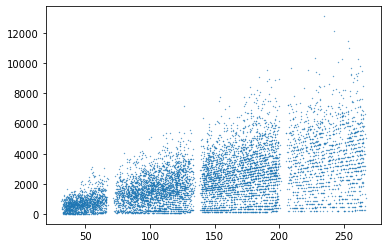

In [16]:
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, s=0.1)

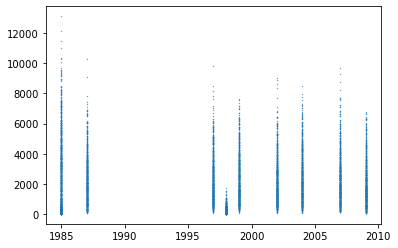

In [17]:
plt.scatter(train.Outlet_Establishment_Year, train.Item_Outlet_Sales, s=0.1)

- 매출이 설립된 연도에는 음의 관계,  상품가격에는 양의 관계.

In [12]:
## 성능 평가 R squared
# 이 모델이 분산의 32%를 설명한다
lreg.score(x_test,y_test)

0.3242020337746537

# 데이터 전체 사용
## 전처리

In [18]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# 무게를 평균치로 대체
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)

In [21]:
# train.Item_Visibility.value_counts().head(10) # 상품의 가시성

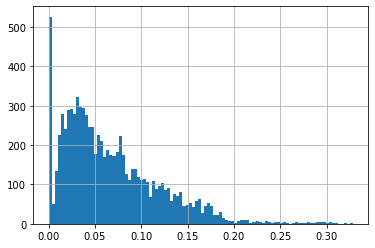

In [22]:
train.Item_Visibility.hist(bins=100)

- 결측치는 아니지만 값이 0 이 많다. 실제로는 결측치로 보고 평균치로 대체

In [23]:
# 0을 평균치로 대체
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

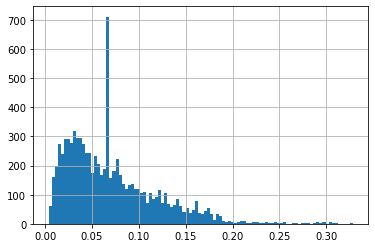

In [24]:
train.Item_Visibility.hist(bins=100)

In [25]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

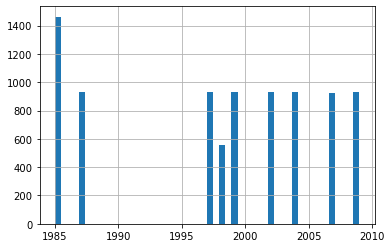

In [26]:
train.Outlet_Establishment_Year.hist(bins=50)

- 설립연도보다는 설립연도 후 경과한 연수로 바꾸는 게 좋겠다.

In [27]:
# 연도를 설립 기간으로 대체 (의미 있는 수치로 대체))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

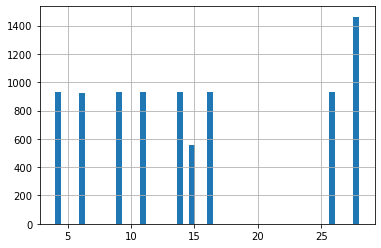

In [28]:
train.Outlet_Establishment_Year.hist(bins=50)

In [29]:
train.Outlet_Size.isnull().sum()

2410

In [30]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- 결측치를 Small 매장으로 대체하겠다

In [31]:
train['Outlet_Size'].fillna('Small',inplace=True) 

In [32]:
train.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [33]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
# 상품명은 분석에서 제외
train.drop("Item_Identifier", axis=1, inplace=True)

In [35]:
train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [36]:
# 카테고리 변수 인코딩
# 먼저 타입이 object인 카테고리 변수의 리스트를 만든다.
object_list = list(train.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [37]:
dummies = pd.get_dummies(train[object_list], prefix= object_list)

In [39]:
dummies.head().T

,0,1,2,3,4
Item_Fat_Content_LF,0,0,0,0,0
Item_Fat_Content_Low Fat,1,0,1,0,1
Item_Fat_Content_Regular,0,1,0,1,0
Item_Fat_Content_low fat,0,0,0,0,0
Item_Fat_Content_reg,0,0,0,0,0
Item_Type_Baking Goods,0,0,0,0,0
Item_Type_Breads,0,0,0,0,0
Item_Type_Breakfast,0,0,0,0,0
Item_Type_Canned,0,0,0,0,0
Item_Type_Dairy,1,0,0,0,0


In [40]:
# 원래의 열은 삭제하고 더미 변수 열을 추가한다.
X1 = train.drop(object_list, axis=1)

In [41]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,3735.1380
1,5.92,0.019278,48.2692,4,443.4228
2,17.50,0.016760,141.6180,14,2097.2700
3,19.20,0.066132,182.0950,15,732.3800
4,8.93,0.066132,53.8614,26,994.7052


In [42]:
# 목적 변수
y = X1.Item_Outlet_Sales
X1 = X1.drop('Item_Outlet_Sales',1)

In [43]:
X1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,14
1,5.920,0.019278,48.2692,4
2,17.500,0.016760,141.6180,14
3,19.200,0.066132,182.0950,15
4,8.930,0.066132,53.8614,26
...,...,...,...,...
8518,6.865,0.056783,214.5218,26
8519,8.380,0.046982,108.1570,11
8520,10.600,0.035186,85.1224,9
8521,7.210,0.145221,103.1332,4


In [49]:
# 스케일링을 하는 경우
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [52]:
X = pd.concat([pd.DataFrame(X1),dummies], axis =1)

In [53]:
dummies.shape, X1.shape, X.shape 

((8523, 41), (8523, 4), (8523, 45))

In [54]:
# 4개의 실수로 된 특성만 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183915
0.3459348199771226


In [55]:
# 45개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1152.9447654115816
0.5486512987093721


# 오차 플롯

- 예측값에 대해 오차의 발생 형태가 랜덤하지 않고 비선형 성분이 많이 들어 있다. 그림에서 양수, 음수 그대로 보임.

Text(0.5, 1.0, 'Residual plot')

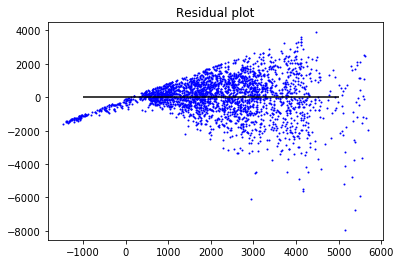

In [56]:
x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

- 전체 45개 특성 계수의 크기를 나열해 보자

In [58]:
Series(lreg.coef_, index=X.columns)

0                                 -8.536518e-01
1                                 -6.228774e+00
2                                  9.789520e+02
3                                 -1.890978e+14
Item_Fat_Content_LF               -6.983124e+13
Item_Fat_Content_Low Fat          -6.983124e+13
Item_Fat_Content_Regular          -6.983124e+13
Item_Fat_Content_low fat          -6.983124e+13
Item_Fat_Content_reg              -6.983124e+13
Item_Type_Baking Goods            -7.833368e+12
Item_Type_Breads                  -7.833368e+12
Item_Type_Breakfast               -7.833368e+12
Item_Type_Canned                  -7.833368e+12
Item_Type_Dairy                   -7.833368e+12
Item_Type_Frozen Foods            -7.833368e+12
Item_Type_Fruits and Vegetables   -7.833368e+12
Item_Type_Hard Drinks             -7.833368e+12
Item_Type_Health and Hygiene      -7.833368e+12
Item_Type_Household               -7.833368e+12
Item_Type_Meat                    -7.833368e+12
Item_Type_Others                  -7.833

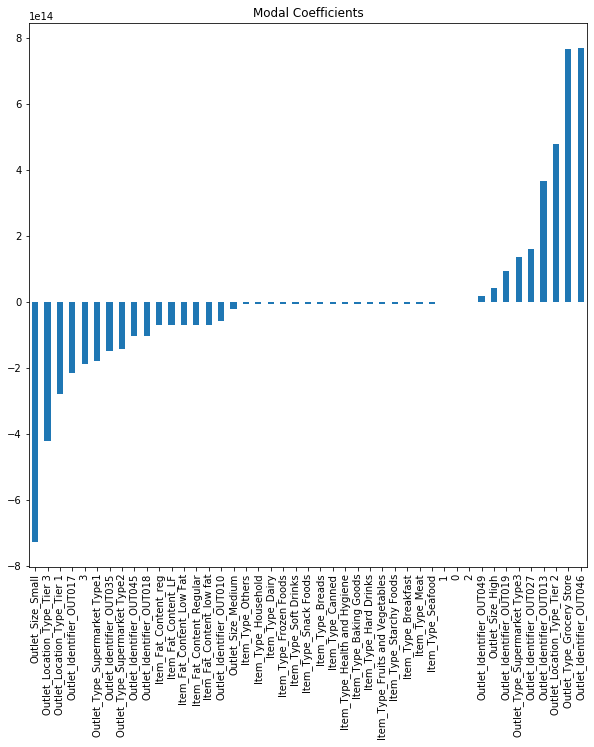

In [59]:
# checking the magnitude of coefficients
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

### 릿지 규제

In [60]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05, normalize=True) 
# normalize: the regressors X will be normalized before regression by subtracting 
# the mean and dividing by the l2-norm
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(1152.9447654115816, 0.5491731608147644)

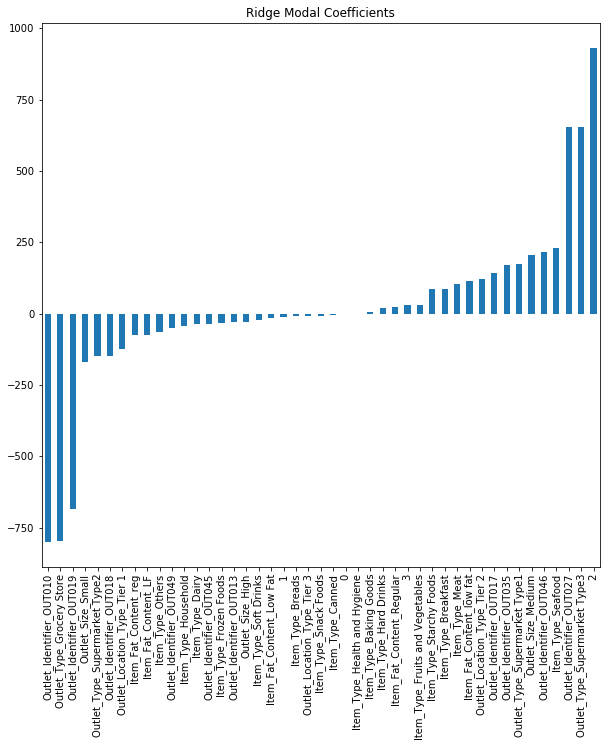

In [61]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

### 위의 결과 -> 큰 계수의 값이 줄어듬 확인.

In [64]:
alpha = [0, 0.001, 0.01, 0.05, 0.5, 1, 5]
for a in alpha:
    ridgeReg = Ridge(alpha=a, normalize=True)
    ridgeReg.fit(x_train,y_train)
    print("a=", a, "R square = ", ridgeReg.score(x_test, y_test))

a= 0 R square =  0.5486534404110446
a= 0.001 R square =  0.5486826382589223
a= 0.01 R square =  0.5489082444202531
a= 0.05 R square =  0.5491731608147644
a= 0.5 R square =  0.5137188639777167
a= 1 R square =  0.4592070091434417
a= 5 R square =  0.23617547945624906


## 라쏘 규제

In [65]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(x_train,y_train)
print(lassoReg.score(x_test,y_test))

0.5493981055951234


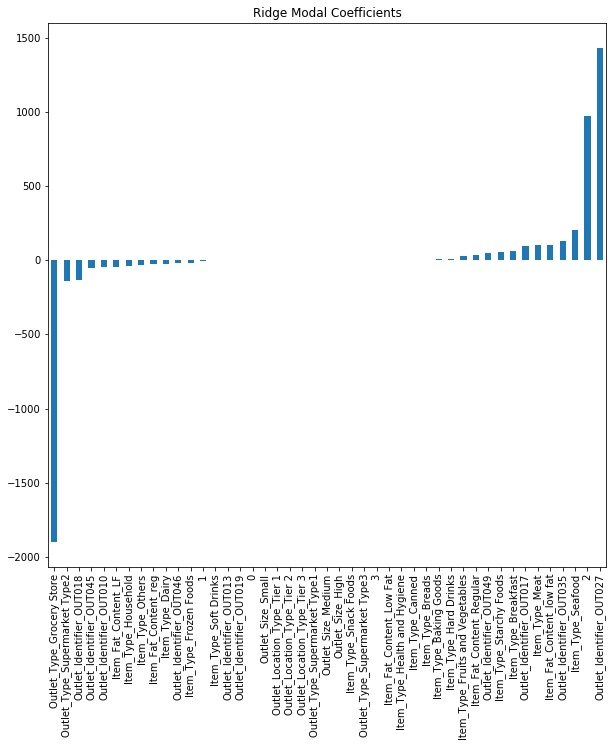

In [66]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients')

#### 결과 -> 중요도가 적은 계수의 크기가 줄어든 것 확인, 모델의 성능은 비슷